########################################## KERNELIZING THE PERCEPTRON ALGORITHM ##########################################


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


BASIC KERNELS AND PREDICTION FUNCTION

In [2]:
def sign(a):
    """Gets the sign of a scalar input."""
    if a >= 0:
        return 1
    else:
        return 0

def dot_kernel(a, b):
    """An implementation of a dot product kernel.

    Args:
        a: A vector
        b: A vector
    """
    return np.dot(a, b)

def rbf_kernel(a, b, sigma=2.5):
    """An implementation of the radial basis function kernel.

    Args:
        a: A vector
        b: A vector
        sigma: The radius of the kernel
    """

    distance = (a - b).dot(a - b)
    scaled_distance = -distance / (2 * (sigma) ** 2)
    return np.exp(scaled_distance)

In [3]:
def initial_state():
    
    """
    Returns the initial state of theta in the form of beta(coefficient) and phi_x(features)
    """
    return np.array([]).reshape((0,1)),np.array([]).reshape((0,3))




In [4]:
def predict(beta,x_k,kernel,x):
    """
    Returns the predicted value of given example
    
    Args:
         beta,x_k:initial state of theta
         kernel:kernel function
         x:initial example for prediction
    """
  
    kernel_mat=np.array([kernel(i,x) for i in x_k])
    
    pred=sign(kernel_mat@beta)
    return pred

In [5]:
def update(state,kernel,lr,x,y):
    
    """
    Updates the state of theta after occurence of an example
    
    Args:
        state:initial state
        kernel:kernel function
        lr:learning rate
        x,y:initial feature and output for prediction and update
    
    """
    
    beta,phi_x=state
    
    beta_upd=lr*(y-(predict(beta,phi_x,kernel,x)))
    
    beta=np.append(beta,[beta_upd],axis=0)
    phi_x=np.append(phi_x,[x],axis=0)
    
    return beta,phi_x
    

In [6]:
def plot_contour(beta,phi_x,kernel):
    
    """
    Plots the contour of the predicted values over a range of x1(x0) nd x2(x1)
    
    Args:
        beta,phi_x:initial state of theta
        kernel:kernel function
    """
    x1,x2=np.meshgrid(np.linspace(-10,10,num=50),np.linspace(-10,10,num=50))
   
  
    z=np.zeros(np.shape(x1))
    for i in range (x1.shape[0]):
        for j in range (x2.shape[1]):
            z[i][j]=predict(beta,phi_x,kernel,[1,x1[i][j],x2[i][j]])
   
    plt.contourf(x1,x2,z, levels=[-float('inf'), 0, float('inf')],colors=['grey', 'cyan'])
            

In [7]:
def plot_data(x,y,title):
    
    """
    To plot the scatterplot of test or train data over contour
    
    Args:
        x,y:features and labels data
        title:title of the plot
        kernel_name:name of kernel used
    """
    
    ind=y[y['y']==1].index.tolist()
    ind1=y[y['y']==0].index.tolist()

    xx=x[['x0']].values
    xx1=x[['x1']].values

    x_1_mod=xx[ind,:]
    x_1_mod1=xx[ind1,:]

    x_2_mod=xx1[ind,:]
    x_2_mod1=xx1[ind1 ,:]

    
     
    
    plt.plot(x_1_mod,x_2_mod,'bo',linewidth=1)
    plt.plot(x_1_mod1,x_2_mod1,'rx',linewidth=1)
    
        
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend(['positive','negative'])
    plt.title(title)
    plt.show()
    

In [8]:
def train_perc(kernel,kernel_name):
    
    """
    To train the kernelised perceptron algorithm
    
    Args:
        kernel:kernel used
        kernel_name:kernel name string
    
    """
    
    data=pd.read_csv(r'ds5_train.csv')
    x_train=data.loc[:,['x0','x1']]
    y_train=data.loc[:,['y']]
    
    x=x_train.values
    y=y_train.values
    
    
    colsx=x_train.shape[0]
    zer=np.ones((colsx,1))
    x_train_new=np.hstack((zer,x))
    x=x_train_new
    
    lr=0.5
    
    state=initial_state()
    for xx,yy in zip(x,y):
        state=update(state,kernel,lr,xx,yy)
    data_test=pd.read_csv(r'ds5_test.csv')
    x_t=data_test.loc[:,['x0','x1']]
    y_t=data_test.loc[:,['y']]
    x_test=x_t.values
    y_test=y_t.values
    
    colsx1=x_t.shape[0]
    zer1=np.ones((colsx1,1))
    x_t_new=np.hstack((zer,x_test))
    x_test=x_t_new
    
    beta,phi_x=state
    
    y_pred=np.array([predict(beta,phi_x,kernel,xt) for xt in x_test])
    y_pred=y_pred[:,np.newaxis]
    
    
    
    acc=(np.mean(y_pred==y_test))*100
    
    f=plt.figure(figsize=(10,10),dpi=100)
    plot_contour(beta,phi_x,kernel)
    plot_data(x_t,y_t,f'Testing data scatterplot over contour formed by using {kernel_name}')
    f.savefig(f'prob_5b_testdata_{kernel_name} pred.png')
    return acc,y_pred 
    
    
    


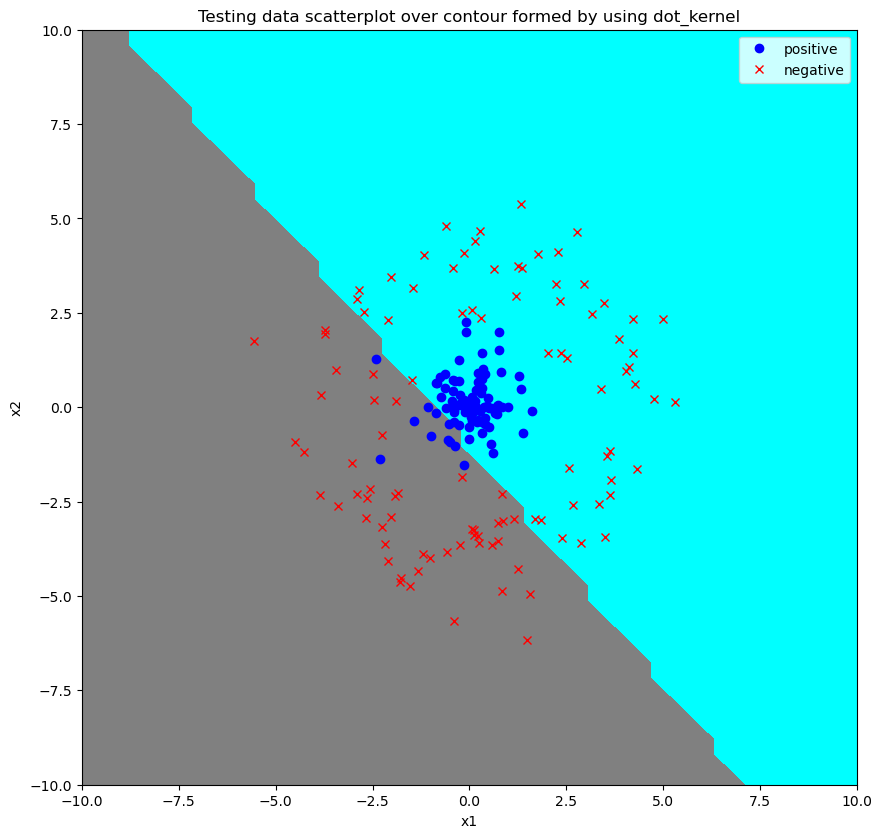

With dot kernel the accuracy is: 67.5%


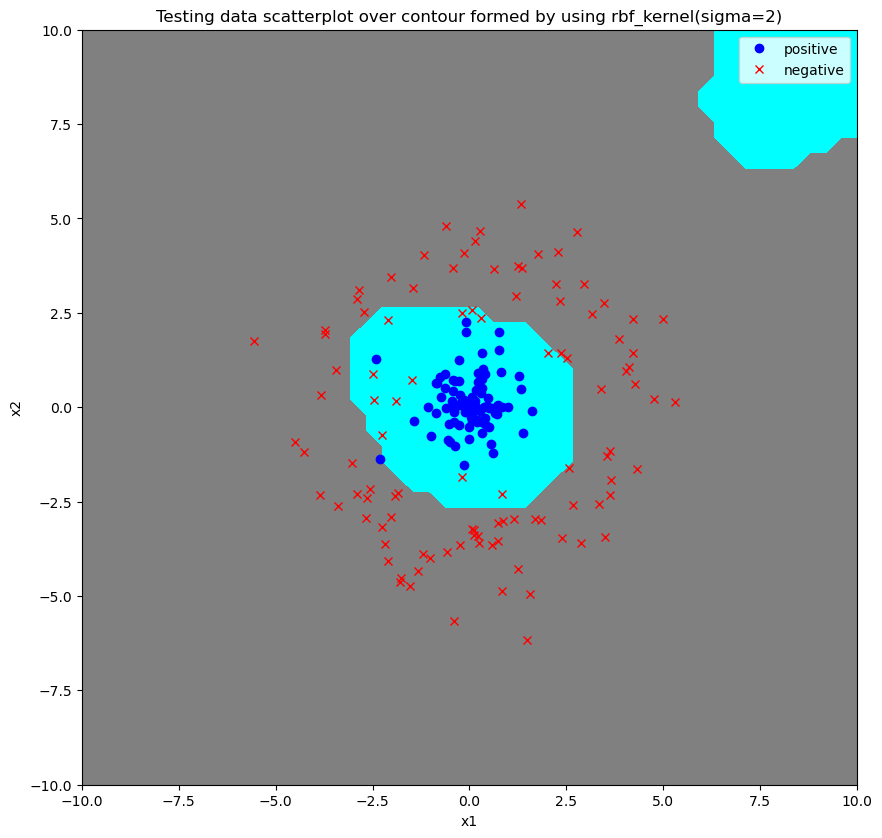

With rbf kernel the accuracy is: 95.5%


In [9]:


if __name__=='__main__':
    acc,y_pred=train_perc(dot_kernel,'dot_kernel')
    print(f'With dot kernel the accuracy is: {acc}%')
    acc,y_pred=train_perc(rbf_kernel,'rbf_kernel(sigma=2)')
    print(f'With rbf kernel the accuracy is: {acc}%')
    